<div>
Olá, Emilly!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Análises bem detalhadas em cada etapa do projeto
    
Entretanto, deixei um comentário em um ponto que precisamos de um pequeno ajuste. Peço que trabalhe nesse ponto para avançarmos.
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**

</div>


# Preparação dos Dados

In [1]:
#Importando Bibliotecas
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#Carregando os Dados
df_rest_data = pd.read_csv('/datasets/rest_data_us.csv')

O dataframe df resultante contém informações sobre o nome, tipo, status da cadeia, endereço e número de assentos para cada restaurante no conjunto de dados. Este dataframe pode então ser usado para análise e visualização adicionais para responder a várias perguntas de pesquisa sobre o mercado de restaurantes em Los Angeles.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente.
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>

# Dataframe rest_data

In [ ]:
#Informação Geral
df_rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [ ]:
#Informação Métrica
df_rest_data.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [ ]:
#Tamanho do Dataframe
df_rest_data.shape

(9651, 6)

In [ ]:
# Olhando para as primeiras linhas do dataframe 
df_rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O método `head()` foi utilizado para exibir uma pequena amostra do conjunto de dados
- O método `info()` foi utilizado para estudo inicial dos dados
  
</div>

In [ ]:
#Verificando nome de colunas
df_rest_data.columns

Index(['id', 'object_name', 'address', 'chain', 'object_type', 'number'], dtype='object')

In [ ]:
# Renomeando as colunas object_name e object_type
df_renamed = df_rest_data.rename(columns={'object_name':'obj_name', 'object_type': 'obj_type'}, inplace=True)

In [ ]:
# Verificando valores exclusivos na coluna Name
df_rest_data['obj_name'].unique()

array(['HABITAT COFFEE SHOP', "REILLY'S", 'STREET CHURROS', ...,
       'FIN-MELROSE', 'MEDIDATE COFFEE', 'CAFE SPROUTS'], dtype=object)

In [ ]:
# verificando a contagem de nomes
df_rest_data['obj_name'].value_counts()

THE COFFEE BEAN & TEA LEAF         47
SUBWAY                             31
DOMINO'S PIZZA                     15
WABA GRILL                         14
KENTUCKY FRIED CHICKEN             14
                                   ..
CITY CLUB OF LA                     1
CASITAS DEL CAMPO                   1
DULCE RINA HALL                     1
PALM GROVE ETHIOPIAN RESTAURANT     1
BUDNAMU KOREAN BBQ HOUSE            1
Name: obj_name, Length: 8672, dtype: int64

In [ ]:
# Verificando valores exclusivos na coluna Endereço
df_rest_data['address'].unique()

array(['3708 N EAGLE ROCK BLVD', '100 WORLD WAY 120',
       '6801 HOLLYWOOD BLVD 253', ..., '6741 HOLLYWOOD BLVD',
       '548 S SPRING ST STE 100', '1300 S SAN PEDRO ST STE 111'],
      dtype=object)

In [ ]:
# Verificando a contagem de endereços
df_rest_data['address'].value_counts()

3607 TROUSDALE PKWY           11
135 N GRAND AVE               10
5151 STATE UNIVERSITY DR       9
600 WORLD WAY                  9
400 WORLD WAY                  9
                              ..
2049 CENTURY PARK E            1
404 S FIGUEROA ST STE #102     1
4582 S CENTINELA AVE           1
10901 S MAIN ST                1
636 S MARIPOSA AVE             1
Name: address, Length: 8512, dtype: int64

In [ ]:
# Verificação de valores únicos na coluna chain 
df_rest_data['chain'].unique()

array([False, True, nan], dtype=object)

In [ ]:
# Verificando a contagem de chain
df_rest_data['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

In [ ]:
# Verificação de valores únicos na coluna type
df_rest_data['obj_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [ ]:
#Verificando contagem de type
df_rest_data['obj_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: obj_type, dtype: int64

In [ ]:
#Verificação de Dados duplicados
df_rest_data.duplicated().sum()

0

In [ ]:
#Verificação de Dados Ausentes
df_rest_data.isna().sum()

id          0
obj_name    0
address     0
chain       3
obj_type    0
number      0
dtype: int64

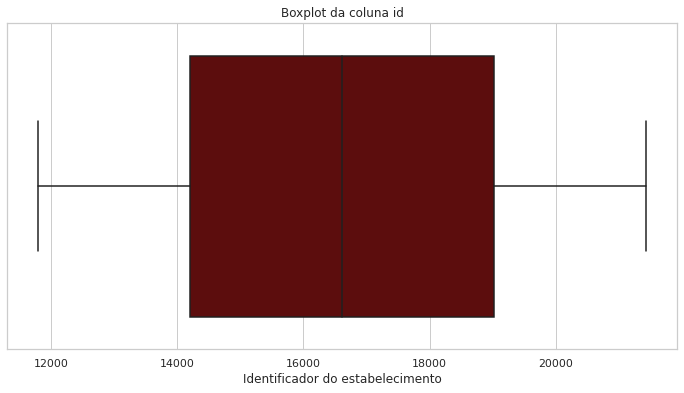

In [ ]:
# Boxplot da coluna id
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rest_data, x='id')
plt.title('Boxplot da coluna id')
plt.xlabel('Identificador do estabelecimento')
plt.show()

Visão geral de df_rest_dat:
Há seis colunas ID, object_name, Address, Chain, object_type e Número, todas têm 9651 linhas, exceto cadeia Colunm, tem 9648 linhas;
As colunas ID e Número são do tipo Int64, a coluna object_name, Address, Chain e object_type são do tipo Objeto;
o nome da coluna foi alterado de object_name para obj_name;
o nome da coluna foi alterado de object_type para obj_type;
Não há diferença entre a média e a mediana na coluna ID;
Há uma grande diferença entre a média e a mediana na coluna numérica;
sem dados duplicados no dataframe;
Há dados faltando na coluna Chain, mas se esses dados forem preenchidos, isso prejudicará a análise de dados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As colunas foram renomeadas para a convenção `snake_case`
- Os valores ausentes foram verificados
- Os tipos de dados foram verificados
- A distribuição dos dados foi verificada

</div>

# Análise de dados

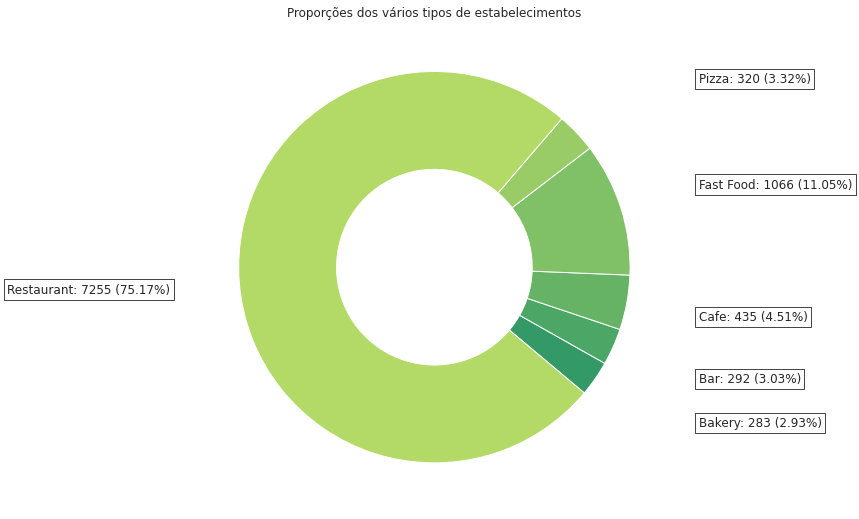

In [ ]:
a, b = [plt.cm.Oranges, plt.cm.summer]


fig, ax_1 = plt.subplots(figsize=(12, 9), subplot_kw=dict(aspect="equal"))

obj_type = df_rest_data.groupby('obj_type')['id'].count()
estabelecimentos = obj_type.index.tolist()
porcentagem = (obj_type / obj_type.sum() * 100).round(2)

annot = []

for i in range(len(estabelecimentos)):
    annot.append(estabelecimentos[i]+": "+ str(obj_type[i])+" ("+str(porcentagem[i])+'%)')
    
colors_1 = [b(.2), b(.3), b(.4), b(.5), b(.6), b(.7)]

wedges, texts = ax_1.pie(obj_type, wedgeprops=dict(width=0.5), startangle=-40, colors = colors_1)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(facecolor='black', lw=3, arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax_1.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)

ax_1.set_title("Proporções dos vários tipos de estabelecimentos")
plt.show()

O gráfico mostra que o tipo de estabelecimento mais comum é o Restaurante, que representa pouco mais de 75% de todos os estabelecimentos de food service no conjunto de dados. O segundo tipo mais comum é o Fast Food, que compreende pouco mais de 11% do total de estabelecimentos. Café/Coffee Shop e Bar aparecem em terceiro e quarto, representando cerca de 5% e 3% dos estabelecimentos, respectivamente. Os outros tipos, incluindo Pizza e Padaria, representam menos de 6% dos estabelecimentos cada um. No geral, o gráfico de pizza nos dá uma visualização rápida e fácil de entender da distribuição dos tipos de estabelecimento no conjunto de dados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os tipos de restaurantes foram analisados corretamente
- Gráficos foram apresentados. Obs.: bom trabalho anotando os gráficos acima com o percentual e usando gráficos interativos
- As observações foram apresentadas
</div>


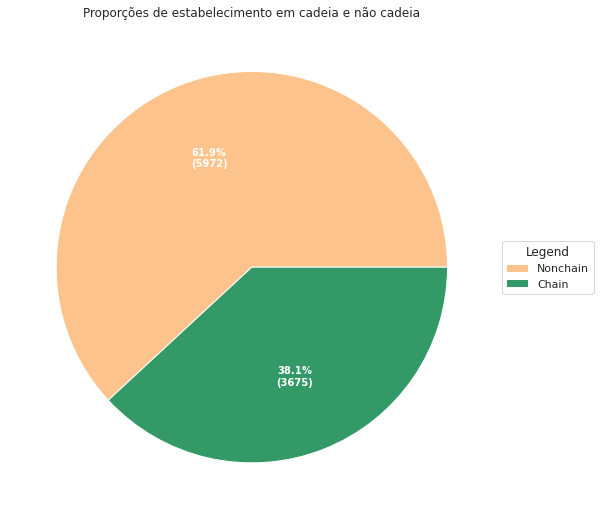

In [ ]:
fig, ax2 = plt.subplots(figsize=(12, 9), subplot_kw=dict(aspect="equal"))

chain = df_rest_data.groupby('chain')['id'].count()
legenda = ['Nonchain', 'Chain']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors_2 = [a(.3), b(.2)]
wedges, texts, autotexts = ax2.pie(chain, autopct=lambda pct: func(pct, chain), textprops=dict(color="w"), 
                                   colors=colors_2)

ax2.legend(wedges, legend,
          title="Legend",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax2.set_title("Proporções de estabelecimento em cadeia e não cadeia")

plt.show()

O gráfico resultante é um gráfico de pizza que mostra as proporções de estabelecimentos em cadeia e não em cadeia no conjunto de dados. O gráfico mostra que o estabelecimento não cadeado domina o estabelecimento cadeado. São mais de 2.200 estabelecimentos fora da cadeia.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os tipos de restaurante de rede foram analisados e apresentados com gráficos
- Gráficos foram apresentados. percentual e usando gráficos interativos
- As observações foram apresentadas
</div>


In [ ]:
chain_pivot = df_rest_data[['chain','obj_type','id']]
chain_pivot = pd.pivot_table(chain_pivot,index=['chain','obj_type'], values='id', aggfunc='count')

chain_pivot

id
chain obj_type        
False Bar          215
      Cafe         169
      Fast Food    461
      Pizza        166
      Restaurant  4961
True  Bakery       283
      Bar           77
      Cafe         266
      Fast Food    605
      Pizza        153
      Restaurant  2292

Esse código cria um novo chain_pivot de dataframe selecionando primeiro três colunas do df_rest_data de dataframe original, ou seja, chain, obj_type e id. Em seguida, ele cria uma tabela dinâmica a partir desse dataframe onde as linhas são agrupadas por cadeia e obj_type e os valores em cada célula da tabela dinâmica são a contagem de id. A tabela dinâmica resultante exibe a contagem de estabelecimentos para cada combinação de cadeia (cadeia ou não-cadeia) e object_type.

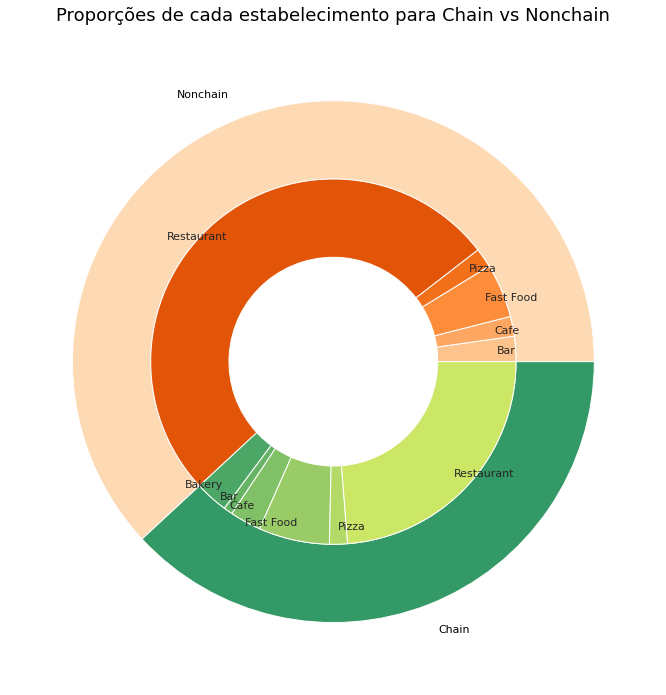

In [ ]:
facecolor = '#ffffff'
font_color = '#000000'
hfont = {'fontname':'DejaVu Sans'}
labels = ['Nonchain','Chain']
inner_labels  = chain_pivot.index.get_level_values(1).to_list()

size = 0.3
vals = chain_pivot['id']

# Major category values = sum of minor category values
group_sum = chain_pivot.groupby('chain')['id'].sum()

fig, ax3 = plt.subplots(figsize=(15, 12), facecolor=facecolor)

outer_colors = [a(.2), b(.2)]
inner_colors = [a(.3), a(.4), a(.5), a(.6), a(.7), 
                b(.3), b(.4), b(.5), b(.6), b(.7), b(.8)]

ax3.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax3.pie(vals, 
       radius=1-size,
       colors=inner_colors,
       labels=inner_labels,
       labeldistance=0.9,
       wedgeprops=dict(width=size, edgecolor='w'))

        
ax3.set_title('Proporções de cada estabelecimento para Chain vs Nonchain', fontsize=18, pad=15, color=font_color, **hfont)
plt.show()

O gráfico resultante mostra uma comparação entre as proporções de cada estabelecimento para as categorias Cadeia e Não-cadeia. O gráfico consiste em dois gráficos de pizza concêntricos. O anel externo representa as duas categorias, Chain e Nonchain, e o anel interno representa os diferentes tipos de estabelecimentos. A proporção de cada tipo de estabelecimento é representada pelo tamanho da fatia correspondente, e os rótulos mostram o nome de cada fatia

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O estudo por tipo de estabelecimento foi feito corretamente (ex.: rede e não rede). Dica: esse gráfico, embora seja visualmente atrativo, é muito carregado de informações. Sempre que possível, opte por gráficos mais simples para apresentar dados multi-níveis (gráfico de barras, por exemplo)
</div>


In [ ]:
model_df = (df_rest_data.groupby(['obj_name', 'chain']).agg({'id':'count','number':'mean'})
           .rename(columns={'id':'number_of_establishment', 'number': 'avg_number_of_seats'}).reset_index())

model_df_train, model_df_valid = train_test_split(model_df, test_size=0.25, random_state=42)

features_train = model_df_train[['number_of_establishment','avg_number_of_seats']]
target_train = model_df_train['chain']

features_valid = model_df_valid[['number_of_establishment','avg_number_of_seats']]
target_valid = model_df_valid['chain']

decision_tree_cols = ['depth', 'acc_train', 'acc_valid']
decision_tree_list = []

for depth in range(1, 11):
    model_dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_dt.fit(features_train, target_train)
    decision_tree_list.append([depth, model_dt.score(features_train, target_train),
                              model_dt.score(features_valid, target_valid)])
    
decision_tree = pd.DataFrame(decision_tree_list, columns=decision_tree_cols)

decision_tree

,depth,acc_train,acc_valid
0,1,0.737360,0.742739
1,2,0.737360,0.742739
2,3,0.737667,0.742278
3,4,0.737667,0.742278
4,5,0.737821,0.741355
5,6,0.738436,0.739972
6,7,0.739050,0.739511
7,8,0.739358,0.739972
8,9,0.739972,0.738589
9,10,0.740741,0.738128


Esse código está executando uma classificação de árvore de decisão em um conjunto de dados chamado model_df que contém informações sobre o número de estabelecimentos e o número médio de assentos para diferentes objetos, agrupados por pertencerem a uma cadeia ou não.
O conjunto de dados é dividido em duas partes: model_df_train e model_df_valid, onde o conjunto de treinamento contém 75% dos dados e o conjunto de teste contém 25% dos dados.
A árvore de decisão é criada usando a classe DecisionTreeClassifier da biblioteca scikit-learn, com diferentes profundidades máximas que variam de 1 a 10. Para cada profundidade, o modelo é treinado nos dados de treinamento e a precisão é calculada para os conjuntos de treinamento e validação.
Os resultados da classificação da árvore de decisão são então armazenados em um DataFrame pandas chamado decision_tree, que contém a profundidade máxima da árvore e as pontuações de precisão para o treinamento e a validação.
-number_of_establishment as feature_0
-avg_number_of_seats as feature_1
Esse modelo, então, será usado para caracterizar o que define uma cadeia ou não-cadeia de estabelecimento.

In [ ]:
#Modelo
model_dt = DecisionTreeClassifier(max_depth=2, random_state=20)
model = model_dt.fit(features_train, target_train)

r = export_text(model)
print(r)

|--- feature_0 <= 1.50
|   |--- feature_1 <= 126.50
|   |   |--- class: False
|   |--- feature_1 >  126.50
|   |   |--- class: False
|--- feature_0 >  1.50
|   |--- feature_1 <= 53.75
|   |   |--- class: True
|   |--- feature_1 >  53.75
|   |   |--- class: True



O código cria um modelo de classificador de árvore de decisão usando a biblioteca scikit-learn. O conjunto de dados utilizado para esse modelo contém informações sobre estabelecimentos em diferentes localidades, incluindo o número de estabelecimentos para cada nome de objeto, o número médio de assentos e se o estabelecimento pertence a uma cadeia ou não.

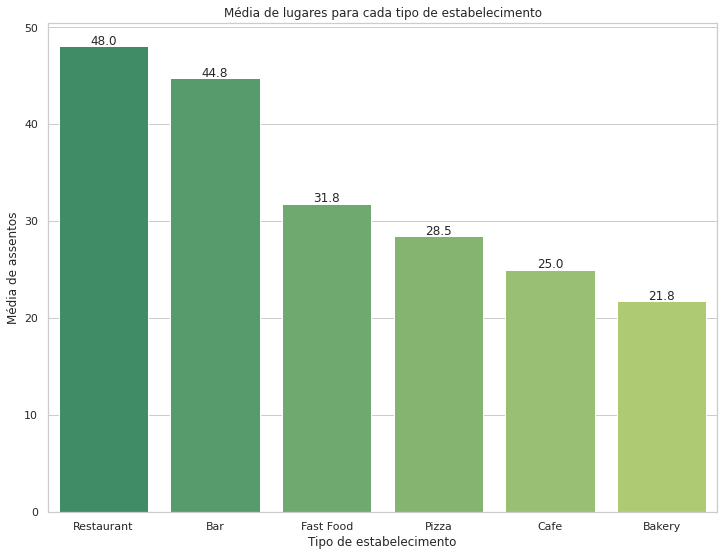

In [ ]:
#Número médio de lugares para cada tipo de estabelecimento

seat_per_type = (df_rest_data
                 .groupby('obj_type')
                 .agg({'number':'mean'})
                 .rename(columns={'number':'avg_number_of_seats'})
                ).reset_index()

plt.figure(figsize=(12, 9))
seat_per_type_graph = sns.barplot(data=seat_per_type.nlargest(6, 'avg_number_of_seats'), 
                                  x='obj_type',
                                  y='avg_number_of_seats',
                                  palette=colors_1)

for g in seat_per_type_graph.patches:
    seat_per_type_graph.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
    
plt.title('Média de lugares para cada tipo de estabelecimento')
plt.xlabel('Tipo de estabelecimento')
plt.ylabel('Média de assentos')
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A distribuição do número de assentos por tipo de estabelecimento foi analisada

</div>


O código gera um gráfico de barras que exibe o número médio de assentos para cada tipo de estabelecimento. O eixo x representa os diferentes tipos de estabelecimentos e o eixo y representa o número médio de assentos. Acima de cada barra, o valor exato do número médio de assentos é exibido. O título do gráfico é Média de assentos para cada tipo de estabelecimento, e os eixos x e y são rotulados de acordo. A partir deste gráfico, pudemos ver que Restaurante lidera com mais assentos médios, seguido por bares e Fast Food.

In [ ]:
#Calculando o número de estabelecimentos e o número médio de lugares por rua
df_rest_data['street_num'] = df_rest_data['address'].str.extract(r'(?P<StreetNo>\d{,5})')
street_df = (df_rest_data
           .groupby('street_num')
           .agg({'id':'count','number':'mean'})
           .rename(columns={'id':'number_of_establishment', 'number': 'avg_number_of_seats'})
           .reset_index())

street_df

,street_num,number_of_establishment,avg_number_of_seats
0,,8,35.875000
1,00936,1,21.000000
2,01253,1,29.000000
3,03742,1,39.000000
4,05358,1,113.000000
...,...,...,...
3993,990,1,27.000000
3994,9901,3,56.333333
3995,9914,1,6.000000
3996,9919,1,13.000000


Esse código está adicionando uma nova coluna ao df_rest_data de dataframe chamado street_num extraindo o primeiro grupo de até cinco dígitos consecutivos encontrados na coluna de endereço usando uma expressão regular. Em seguida, agrupa o dataframe df_rest_data pela coluna street_num recém-criada e calcula o número de estabelecimentos e o número médio de assentos por rua. Ele armazena o dataframe resultante em street_df.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os nomes das duas foram extraídos corretamente.
</div>


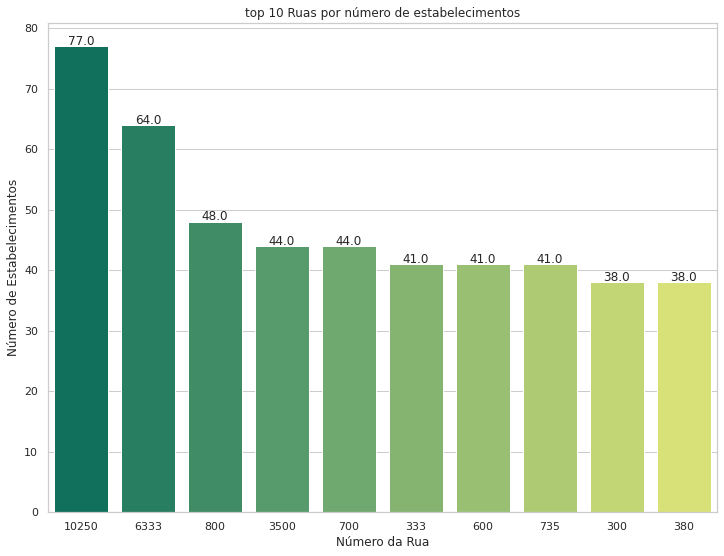

In [ ]:
# As 10 principais ruas do conjunto de dados com o maior número de estabelecimentos
plt.figure(figsize=(12, 9))

colors_3 = [b(.0), b(.1),b(.2), b(.3), b(.4), b(.5), b(.6), b(.7), b(.8), b(.9)]

street_graph = sns.barplot(data=street_df.nlargest(10, 'number_of_establishment'), 
                                  x='street_num',
                                  y='number_of_establishment',
                                  palette=colors_3)

for g in street_graph.patches:
    street_graph.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
    
plt.title('top 10 Ruas por número de estabelecimentos')
plt.xlabel('Número da Rua')
plt.ylabel('Número de Estabelecimentos')
plt.show()

O gráfico resultante mostra as 10 principais ruas do conjunto de dados com o maior número de estabelecimentos. O eixo x representa o número da rua extraído da coluna street_num do conjunto de dados e o eixo y representa o número de estabelecimentos em cada rua. Cada bar tem uma etiqueta no topo que mostra o número exato de estabelecimentos naquela rua. O gráfico permite identificar rapidamente as ruas mais movimentadas em termos de número de estabelecimentos, o que pode ser útil para as empresas procurarem

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A distribuição de restaurantes por rua foi analisada
</div>

In [ ]:
print('Número de ruas que possuem apenas um restaurante:', 
      street_df[street_df['number_of_establishment'] == 1]['street_num'].count())

Número de ruas que possuem apenas um restaurante: 2126


In [ ]:
temp_street_df = street_df[street_df['number_of_establishment'] > 1]

temp_street_df


,street_num,number_of_establishment,avg_number_of_seats
0,,8,35.875000
8,1,4,163.250000
10,100,32,63.593750
11,1000,21,56.142857
15,10004,4,9.750000
...,...,...,...
3983,9829,2,6.000000
3984,984,3,21.000000
3992,988,3,74.333333
3994,9901,3,56.333333


Esse código cria um novo DataFrame temp_street_df que filtra o DataFrame street_df original para incluir apenas linhas em que o valor da coluna number_of_establishment é maior que 1, indicando que a rua tem mais de um estabelecimento.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A distribuição do número de assentos por rua foi analisada e um gráfico foi apresentado
- Dica: aqui você poderia plotar a distribuição em gráficos separados (subplots) para melhor visualização e interpretação dos dados acima. Além disso, você poderia dividir as ruas com maior número de restaurantes vs ruas com menos restaurantes.
</div>


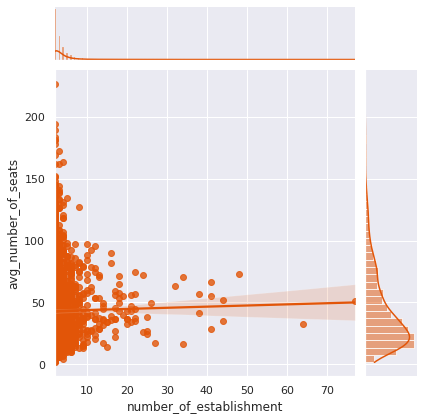

In [ ]:
# O gráfico mostra a correlação entre a contagem média de assentos e os estabelecimentos 
# em cada rua, usando uma linha de regressão linear e um histograma para cada variável
sns.set(rc={'figure.figsize':(12, 9)})

sns.jointplot(data=temp_street_df, x='number_of_establishment', y='avg_number_of_seats', kind='reg', color=a(.7));

O código gera um gráfico de dispersão da relação entre o número médio de assentos e o número de estabelecimentos em cada rua. O gráfico também inclui uma linha de regressão linear e um histograma para cada variável. O eixo x representa o número de estabelecimentos, enquanto o eixo y representa o número médio de assentos. A parcela é gerada usando a função jointplot de Seaborn. O gráfico conjunto com reta de regressão entre o número de estabelecimentos e o número médio de assentos mostra uma correlação positiva entre essas duas variáveis. À medida que o número de estabelecimentos em uma rua aumenta, o número médio de assentos também tende a aumentar. A linha de regressão sugere que essa relação é moderadamente forte.

# Conclusão Final
Visão geral do datatframe df_rest_data:

O dataframe consiste em seis colunas: id, object_name, address, chain, object_type e number. Todas as colunas têm 9651 linhas, exceto a cadeia que tem 9648. As colunas id e number são do tipo int64, enquanto as colunas object_name, address, chain object_type são do tipo object, respectivamente. As colunas object_name e object_type nomes foram alteradas para obj_name e obj_type respectivamente. Não existem dados duplicados e não há dados em falta.
Neste projeto, analisamos um conjunto de dados contendo informações sobre vários restaurantes em Los Angeles. Exploramos os dados usando vários gráficos para entender melhor as características dos restaurantes, como o número de lugares, o tipo de estabelecimento e a localização.
Em conclusão, este projeto fornece insights sobre a cena de restaurantes em Los Angeles. Esses insights podem ser usados por proprietários de restaurantes e investidores para tomar decisões informadas sobre a abertura de novos restaurantes ou investir nos existentes. A análise também pode ser usada pelo governo local para regular o número e os tipos de restaurantes em uma determinada rua ou em uma determinada área.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Bom trabalho com a condução do seu projeto. A sua conclusão final está muito boa, porém você precisa disponibilizar uma apresentação hospedada na nuvem com o os principais pontos do seu estudo. Peço que envie o link para que possa revisar.
</div>
